<a href="https://colab.research.google.com/github/Yashvir-13/Intrusion-Detection-System/blob/main/Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""
columns=[]
for i in cols.split(','):
  if (i.strip()):
    columns.append(i.strip())
columns.append("target")
columns



['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/kddcup.data.corrected")

In [ ]:
df.columns=columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898430 entries, 0 to 4898429
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [ ]:
attack_type={"normal":"normal",
"back": "dos",
"buffer_overflow":"u2r",
"ftp_write" :"r2l",
'guess_passwd' :'r2l',
'imap' :'r2l',
'ipsweep' :'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop' :'r2l',
'neptune': 'dos',
'nmap' :'probe',
'perl': 'u2r',
'phf' :'r2l',
'pod': 'dos',
'portsweep' :'probe',
'rootkit' :'u2r',
'satan' :'probe',
'smurf' :'dos',
'spy' :'r2l',
'teardrop' :'dos',
'warezclient' :'r2l',
'warezmaster' :'r2l'}

In [ ]:
df["attack_types"]=df.target.apply(lambda x:attack_type[x[:-1]])

In [ ]:
df["attack_types"].value_counts()

attack_types
dos       3883370
normal     972780
probe       41102
r2l          1126
u2r            52
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
num_cols=df.select_dtypes('number')
cat_cols=df.select_dtypes('object')
cat_cols.drop(["target","attack_types"],axis=1,inplace=True)

In [ ]:
for i in cat_cols.columns:
  plt.subplots(figsize=(10,5))
  sns.countplot(x=i,hue="attack_types",data=df)
  plt.show()

In [ ]:
#plt.figure(figsize=(18,10),dpi=96)
#sns.countplot(x="logged_in",hue="attack_types",data=df)
#plt.show()

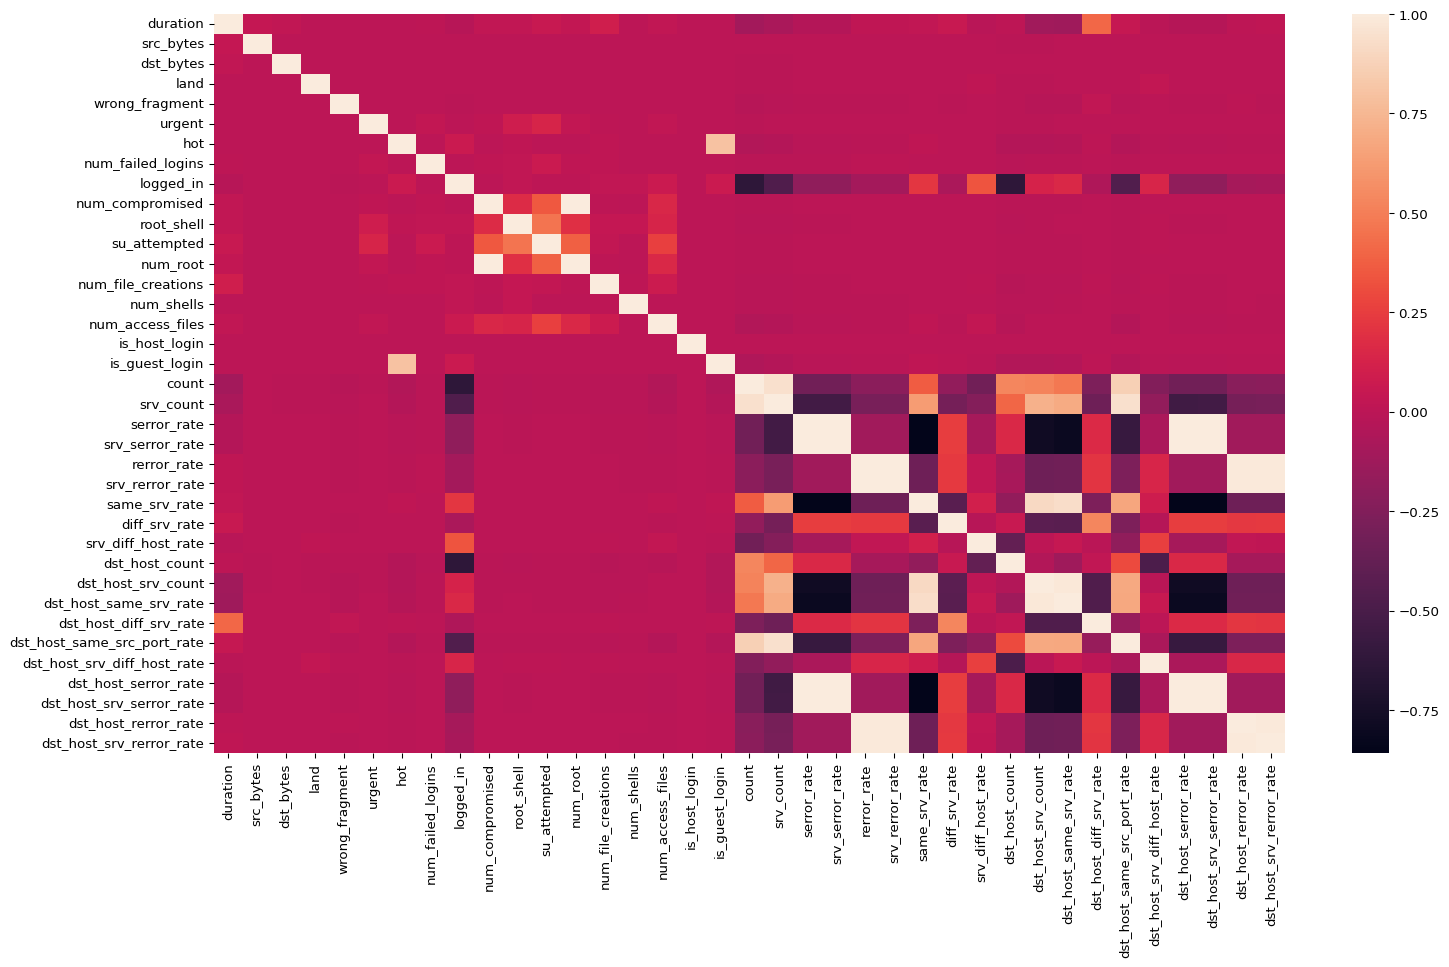

In [ ]:
#df.drop("num_outbound_cmds",axis=1)
plt.figure(figsize=(18,10),dpi=96)
sns.heatmap(df[num_cols.drop("num_outbound_cmds",axis=1).columns].corr())
plt.show()

In [ ]:
df.drop('num_root',axis=1,inplace=True)
df.drop('srv_serror_rate',axis=1,inplace=True)
df.drop('srv_rerror_rate',axis=1,inplace=True)
df.drop('dst_host_srv_serror_rate',axis=1,inplace=True)
df.drop('dst_host_srv_rerror_rate',axis=1,inplace=True)
df.drop('dst_host_serror_rate',axis=1,inplace=True)
df.drop('dst_host_rerror_rate',axis=1,inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)
df=df[[ col for col in df if df[col].nunique()>1]]
df.shape

(4898430, 34)

In [ ]:
df_std=df._get_numeric_data().std()
df_std=df_std.sort_values(ascending=True)
df_std

is_host_login                       0.000639
land                                0.002391
urgent                              0.007215
num_failed_logins                   0.007299
su_attempted                        0.008082
root_shell                          0.008257
num_shells                          0.008738
is_guest_login                      0.028887
num_access_files                    0.035510
dst_host_srv_diff_host_rate         0.041260
wrong_fragment                      0.042854
diff_srv_rate                       0.082715
dst_host_diff_srv_rate              0.108543
num_file_creations                  0.124186
srv_diff_host_rate                  0.140560
rerror_rate                         0.232253
logged_in                           0.350611
serror_rate                         0.381876
same_srv_rate                       0.389296
hot                                 0.468978
dst_host_same_src_port_rate         0.480988
num_compromised                     3.856481
dst_host_c

In [ ]:
for i in cat_cols.columns:
  print(df[i].value_counts())

protocol_type
icmp    2833545
tcp     1870597
udp      194288
Name: count, dtype: int64
service
ecr_i        2811660
private      1100831
http          623090
smtp           96554
other          72653
              ...   
tftp_u             3
harvest            2
aol                2
http_8001          2
http_2784          1
Name: count, Length: 70, dtype: int64
flag
SF        3744327
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: count, dtype: int64


In [ ]:
pmap={'icmp':1,'tcp':2,'udp':3}
df['protocol_type']=df['protocol_type'].map(pmap)
df["protocol_type"].value_counts()


protocol_type
1    2833545
2    1870597
3     194288
Name: count, dtype: int64

In [ ]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
df.drop('service',axis=1,inplace=True)

In [ ]:
df.drop('target',axis=1,inplace=True)
df["attack_types"].value_counts()

attack_types
dos       3883370
normal     972780
probe       41102
r2l          1126
u2r            52
Name: count, dtype: int64

In [ ]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

In [ ]:
atmap={"normal":0,"dos":1,"probe":2,"r2l":3,"u2r":4}
df["attack_types"]=df["attack_types"].map(atmap)

In [ ]:
final_feat={}
for i in df.columns:
  if df[i].corr(df["attack_types"])<=-0.5 or df[i].corr(df["attack_types"])>=0.5:
    final_feat[i]=df[i].corr(df["attack_types"])
final_feat


{'protocol_type': -0.5931452140685219,
 'logged_in': -0.7918251271147185,
 'count': 0.7207520589697614,
 'srv_count': 0.5284143828234094,
 'dst_host_count': 0.608808057608089,
 'attack_types': 1.0}

In [ ]:
df['srv_count'].value_counts

<bound method IndexOpsMixin.value_counts of 0           2
1           1
2           2
3           3
4           4
           ..
4898425    32
4898426    33
4898427    34
4898428    35
4898429     1
Name: srv_count, Length: 4898430, dtype: int64>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
feat_df_rescaled=scaler.fit_transform(df[['','count','srv_count','dst_host_count']])
feat_df_rescaled=pd.DataFrame(feat_df_rescaled)
feat_df_rescaled.columns=['count','srv_count','dst_host_count']
feat_df_rescaled.head()


KeyError: "[''] not in index"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
x_train,x_test,y_train,y_test=train_test_split(df[final_feat.keys()],df["attack_types"],stratify=df["attack_types"],test_size=0.3,random_state=42)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=30,random_state=42,n_jobs=-1,class_weight='balanced')
rfc_model.fit(x_train,y_train)
rfc_accuracy=rfc_model.score(x_test,y_test)
rfc_accuracy


1.0

In [ ]:
rfc_y_pred=rfc_model.predict(x_test)
print(classification_report(y_test,rfc_y_pred))
print(confusion_matrix(y_test,rfc_y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    291834
           1       1.00      1.00      1.00   1165011
           2       1.00      1.00      1.00     12330
           3       1.00      1.00      1.00       338
           4       1.00      1.00      1.00        16

    accuracy                           1.00   1469529
   macro avg       1.00      1.00      1.00   1469529
weighted avg       1.00      1.00      1.00   1469529

[[ 291834       0       0       0       0]
 [      0 1165011       0       0       0]
 [      0       0   12330       0       0]
 [      0       0       0     338       0]
 [      0       0       0       0      16]]


In [ ]:
# prompt: save rfc_model so that it can be anywhere else

import pickle

with open('/content/drive/MyDrive/rfc_model.pkl', 'wb') as f:
  pickle.dump(rfc_model, f)


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(rfc_model,df[final_feat.keys()],df["attack_types"],cv=5,scoring='accuracy')
print(cv_scores)
print('mean CV score',cv_scores.mean())

[0.9993304  1.         0.99999796 0.99999898 1.        ]
mean CV score 0.9998654670986419


In [ ]:
import joblib
joblib.dump(rfc_model,'/content/drive/MyDrive/rfc_model.joblib')

['/content/drive/MyDrive/rfc_model.joblib']